<a href="https://colab.research.google.com/github/VIVEK818713/Classification/blob/main/1_Naive_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Naive Bayes algorithm?

### Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

* For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. 
* Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

### Bayes Theorem
 

* It is a theorem that works on conditional probability. 
* Conditional probability is the probability that something will happen, given that something else has already occurred.
* The conditional probability can give us the probability of an event using its prior knowledge. 

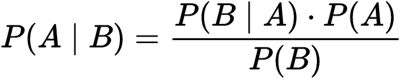

Where, 

P(A): The probability of hypothesis H being true. This is known as the prior probability.

P(B): The probability of the evidence.

P(A|B): The probability of the evidence given that hypothesis is true.  

P(B|A): The probability of the hypothesis given that the evidence is true.

### How Naive Bayes algorithm works?

Let’s understand it using an example. Below there is a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). 

Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

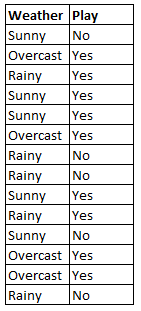

### Step 1: Convert the data set into a frequency table

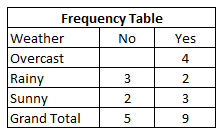

### Step 2: Create Likelihood table by finding the probabilities

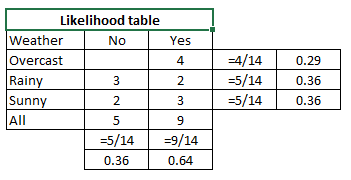

Here in overcast row there are total 4 overcast

In Rainy row there are total 5 rainy

In Sunny row there are total 5 Sunny

And in "No" column there are 5 "No"

in "Yes" column there are 9 "No"

And we have 14 elements in total


### Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

## Problem: Players will play if weather is sunny. Is this statement is correct?

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here we have 

P (Sunny |Yes) = 3/9 = 0.33, 

P(Sunny) = 5/14 = 0.36, 

P( Yes)= 9/14 = 0.64

Now

P (Yes | Sunny) = 0.33 * 0.64 / 0.36 

= 0.60, which has higher probability.


Because probability of P (No | Sunny) will be 1-P (Yes | Sunny)

which is 0.40 which is less

so statment is true for P (Yes | Sunny)

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. 

This algorithm is mostly used in text classification and with problems having multiple classes.

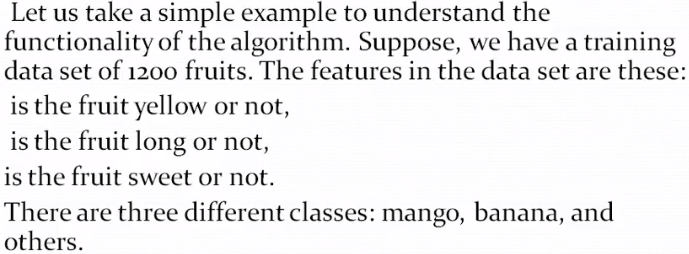

### Step 1: frequency Table

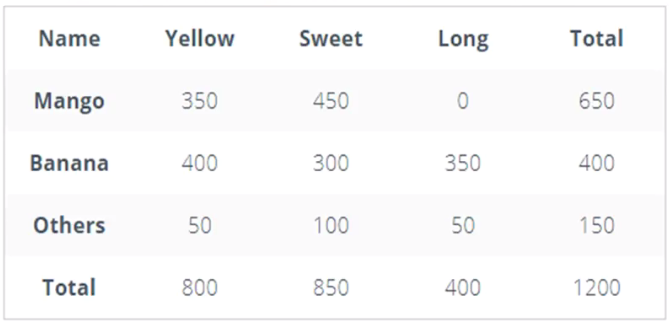

### Step 2: Draw the likelihood table for the features against the classes

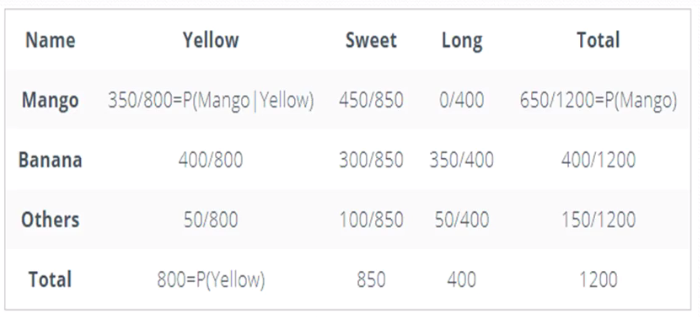

### Calculate theconditional probabilties for all classes 

P(Mango | Yellow,Sweet,Long) =P(Yellow | Mango) * P(Sweet | Mango) * P(Long | Mango)  * P(Mango) **/** P(Yellow,Sweet,Long)


P(Banana | Yellow,Sweet,Long) =P(Yellow | Banana) * P(Sweet | Banana) * P(Long | Banana)  * P(Banana) **/** P(Yellow,Sweet,Long)


P(Others | Yellow,Sweet,Long) =P(Yellow | Others) * P(Sweet | Others) * P(Long | Others)  * P(Others) **/** P(Yellow,Sweet,Long)

### Let's do some hands on ParT 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/Naive Bayes/titanic.csv")
df.head()

### Now we are going to drop below columns
### ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked']
### Because these columns are not so relevant 
### Drop them and modify df once again

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

In [ ]:
X = df.drop('Survived',axis='columns')
y = df.Survived

 if you observe that we have a categorical columns "sex"

 we have to convert in numeric form because we should have only numerical data in machine learning

 i am showing you two ways you can pick any one

In [ ]:
# Fisrt way is using map ()
#X.Sex = X.Sex.map({'male': 1, 'female': 2})

## First way to use get dummy() for simple understanding

after that we will try 2 way for the same

In [ ]:
# i ma using 2 way using getdummy() of pandas
d = pd.get_dummies(X.Sex)
d.head(3)

### Now concat wit it our X

In [ ]:
X = pd.concat([X,d],axis='columns')
X.head(3)

### now this sex column is not needed any more so drop it
### we can also delete either male column or female column because 1 is enough
### drop male also

In [ ]:
X.drop(['Sex','male'],axis='columns',inplace=True)
X.head(3)

## second way to use get dummy() for simple understanding

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/Naive Bayes/titanic.csv")


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)


In [ ]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [ ]:
X=pd.get_dummies(X,drop_first=True,prefix="")

In [ ]:
X.head()

### Now check if there is any NaN value

In [ ]:
X.isnull().sum()

### Age columns has 177 NAN value so fill it with Age mean

In [ ]:
X['Age']=X['Age'].fillna(X.Age.mean())

### Check whether it is done or not

In [ ]:
X.isnull().sum()

**Perfect**

### Now split the data in train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Lets create the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
X_test[0:10]

In [ ]:
y_test[0:10]

In [ ]:
model.predict(X_test[0:10])

In [ ]:
model.predict_proba(X_test[:10])

**Calculate the score using cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

In [ ]:
import pandas as pd
import numpy as np

## Introduction to Bag of Words (BoW) and Sci-kit implementation

###Our dataset is a large collection fo text data (5572 rows). As our model will only accept numerical data as input, we should process the text messages. Here is where the Bag of Words comes into play.

### Bag of Words is a term used to specify the problems that have a collection of text data that needs to be processed. 

### The idea is to take a piece of the text and count the frequency of the words in the text.

### BoW treats each word indepently and the order isn’t relevant.

### We can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

As ann example if we have the following 4 documents:

### ['Hello, how are you!', 'Win money, win from home.', 'Call me now', 'Hello, Call you tomorrow?']

We will convert the text to a frequency distribution matrix as the following:

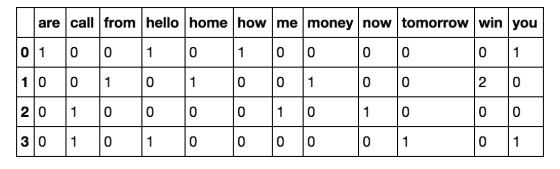

The documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.


We will use the sklearns CountVectorizer method which does the following:


* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrence of each of those tokens.
* It automatically converts all tokenized words to their lower case form so that it does not treat words like ‘He’ and ‘he’ differently.
* It also ignores all punctuation so that words followed by a punctuation mark (for example: ‘hello!’) are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: ‘hello’).
* The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to english, CountVectorizer will automatically ignore * all words(from our input text) that are found in the built in list of english stop words in scikit-learn.


The sci-kit learn implementation would be the following:

In [ ]:
# Define the documents
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']
# Import the count vectorizer and initialize it
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
# Print the 'count_vector' object which is an instance of 'CountVectorizer()'
print(count_vector)

To fit the document dataset to the CountVectorizer object created we will use the fit() methd, 

and get the list of words that have been categorized as features using the get_feature_names() method. 

This method returns our feature names for this dataset, which is the set of words that make up our vocabulary for ‘documents’.

In [ ]:
count_vector.fit(documents)
names = count_vector.get_feature_names()
names

Next, we want to create a matrix with the rows being each of the 4 documents, 

and the columns being each word. 

The corresponding (row, column) value will be the frequency of occurrence of that word(in the column) in a particular document(in the row).

We can do this using the transform() method and passing in the document data set as the argument. 

The transform() method returns a matrix of numpy integers, you can convert this to an array using toarray().

In [ ]:
doc_array = count_vector.transform(documents).toarray()
doc_array

### To make it easier to understand, our next step is to convert this array into a dataframe and name the columns appropriately.

In [ ]:
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

We have now successfully implemented a Bag of Words problem for a document dataset that we created.


One potential issue that can arise from using this method out of the box is the fact that if our dataset of text is extremely large, there will be certain values that are more common that others simply due to the structure of the language itself. So for example words like ‘is’, ‘the’, ‘an’, pronouns, grammatical constructs etc could skew our matrix and affect our analyis


To mitigate this, we will use the stop_words parameter of the CountVectorizer class and set its value to english.

###Splitting Dataset in Training and Testing Sets
We want to split our data so it has the following shape:
* X_train is our training data for the 'sms_message' column.
* y_train is our training data for the 'label' column
* X_test is our testing data for the 'sms_message' column.
* y_test is our testing data for the 'label' column Print out the number of rows we have in each our training and testing data.

### you can download dataset from following link

https://www.kaggle.com/team-ai/spam-text-message-classification

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/Naive Bayes/SPAM text message.csv")
df.head()

### Data Preprocessing

Now, as sci-kit learn only handles numerical values as inputs, we will convert our labels to binary variables. 0 will represent ‘ham’ and 1 will represent ‘spam’.

To perform the conversion:

In [ ]:
df['label']=df.label.map({'ham':0,'spam':1})

In [ ]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

### Apply BoW to process our dataset
Now that we have split the data, the next objective is toconvert our data into the desired matrix format.

To do this we will be using CountVectorizer() as we did before. There are two steps to consider here:
* Firstly, we have to fit our training data (X_train) into CountVectorizer() and return the matrix.
* Secondly, we have to transform our testing data (X_test) to return the matrix.

The code for this segment is in 2 parts. 

Firstly, we are learning a vocabulary dictionary for the training data and then transforming the data into a document-term matrix; 

secondly, for the testing data we are only transforming the data into a document-term matrix.

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

### Naive Bayes Implementation with Sci-Kit Learn
We will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). 


It takes in integer word counts as its input. 

On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.


We will import the MultinomialNB classifier and fit the training data into the classifier using fit().

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

Now that our algorithm has been trained using the training data set we can now make some predictions on the test datastored in ‘testing_data’ using predict().

In [ ]:
predictions = naive_bayes.predict(testing_data)

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

### Model evaluation
There are various mechanisms for doing so, but first let’s do quick recap of them.
* Accuracy: Measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).
* Precision: Tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification).
### Precision = [True Positives/(True Positives + False Positives)]

* Recall(sensitivity): Tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam.
### Recall = [True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren’t, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score.


* For such cases, precision and recall come in very handy. These two metrics can be combined to get the **F1 score**, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.


* We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

### Conclusion
* One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words.
* Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.
* The other major advantage it has is its relative simplicity. Naive Bayes works well right out of the box and tuning it’s parameters is rarely ever necessary.
* It rarely overfits the data.
* Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle.